In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df=pd.read_csv('height__weight.csv')

In [4]:
df.head()

,weight,height
0,45,120
1,58,135
2,48,123
3,60,145
4,70,160


Text(0, 0.5, 'height')

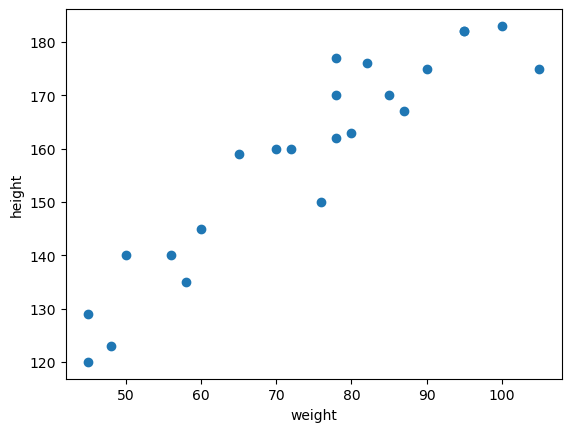

In [5]:
plt.scatter(df['weight'],df['height'])
plt.xlabel('weight')
plt.ylabel('height')

In [6]:
## it is clearly seen the relationship is linear regression
##let see what how the height weigth is correlated
df.corr()

,weight,height
weight,1.000000,0.931142
height,0.931142,1.000000


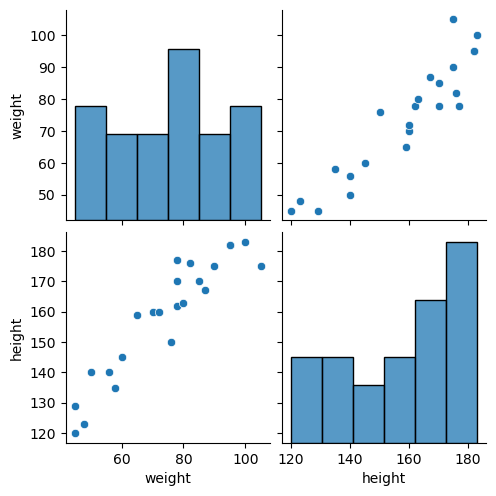

In [7]:
sns.pairplot(df)

In [8]:
##now distribute the data in X and y ie dependent and independent features
X=df[['weight']]
type(X)  ## THE INdependent feature should be in dataframe format or 2d array

pandas.core.frame.DataFrame

In [9]:
np.array(X)

array([[ 45],
       [ 58],
       [ 48],
       [ 60],
       [ 70],
       [ 78],
       [ 80],
       [ 90],
       [ 95],
       [ 78],
       [ 82],
       [ 95],
       [105],
       [100],
       [ 85],
       [ 78],
       [ 50],
       [ 65],
       [ 76],
       [ 87],
       [ 45],
       [ 56],
       [ 72]], dtype=int64)

In [10]:
X.shape

(23, 1)

In [11]:
X.head() ## important to note that X should be in dataframe or 2d arrray

,weight
0,45
1,58
2,48
3,60
4,70


In [12]:
y=df['height']## it should be in series or can be say that 1d array
type(y)

pandas.core.series.Series

In [13]:
np.array(y).shape

(23,)

In [14]:
y.head()

0    120
1    135
2    123
3    145
4    160
Name: height, dtype: int64

In [15]:
##now we do train_test_split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=42)

In [16]:
X_train

,weight
1,58
13,100
5,78
2,48
11,95
20,45
3,60
4,70
18,76
16,50


In [17]:
X_test

,weight
15,78
9,78
0,45
8,95
17,65
12,105


In [18]:
y_train

1     135
13    183
5     162
2     123
11    182
20    129
3     145
4     160
18    150
16    140
21    140
22    160
7     175
10    176
14    170
19    167
6     163
Name: height, dtype: int64

In [19]:
y_test

15    177
9     170
0     120
8     182
17    159
12    175
Name: height, dtype: int64

In [20]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(17, 1)
(6, 1)
(17,)
(6,)


In [21]:
##Standardization
##why standardization
## reason is denpendent and independent features have different unit ex- height and weight aur jo height hai na uski value bahut jyada hai jisse hamari convergence bahut halki hoti hai toh by the use of Z-SCORE in standardization we convert into the data which have mean=0 and standard deviation=1

In [22]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

In [23]:
## we only play standardization on training dataset
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)## why we not use fit_transform in test dataset because of data leakage in which we use mean and standard deviation of training dataset

In [24]:
X_train

array([[-0.87662801],
       [ 1.66773133],
       [ 0.33497168],
       [-1.48242785],
       [ 1.36483141],
       [-1.6641678 ],
       [-0.75546804],
       [-0.1496682 ],
       [ 0.21381171],
       [-1.36126788],
       [-0.99778797],
       [-0.02850823],
       [ 1.06193149],
       [ 0.57729161],
       [ 0.75903157],
       [ 0.88019153],
       [ 0.45613165]])

In [25]:
X_test

array([[ 0.33497168],
       [ 0.33497168],
       [-1.6641678 ],
       [ 1.36483141],
       [-0.45256812],
       [ 1.97063125]])

In [26]:
##nOW apply linear regression
## part of model_training
from sklearn.linear_model import LinearRegression
regression=LinearRegression()

In [27]:
regression.fit(X_train,y_train)


LinearRegression()

In [28]:
y_pred=regression.predict(X_test)

In [29]:
y_pred

array([162.26499721, 162.26499721, 127.68347133, 180.07972266,
       148.64197186, 190.55897293])

In [30]:
print("coefficient of bestfit line",regression.coef_)
print("coefficient of bestfit line",regression.intercept_)


coefficient of bestfit line [17.2982057]
coefficient of bestfit line 156.47058823529412


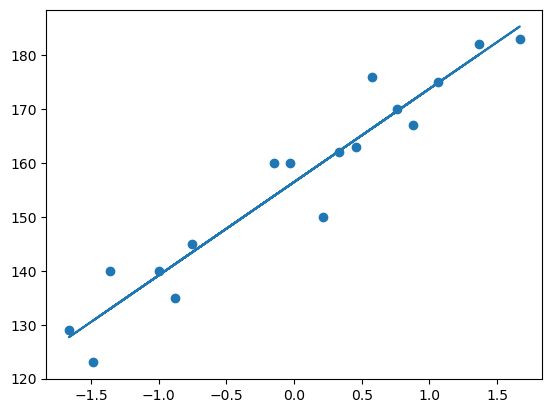

In [31]:
# plt.scatter(X_train,y_train)
plt.scatter(X_train,y_train)
plt.plot(X_train,regression.predict(X_train))


In [32]:
##now we see perfomance metrics
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [33]:
mae=mean_absolute_error(y_test,y_pred)
mse=mean_squared_error(y_test,y_pred)
rmse=np.sqrt(mse)
print(mae)
print(mse)
print(rmse)

9.665125886795005
114.84069295228699
10.716374991212605


In [34]:
from sklearn.metrics import r2_score
score=r2_score(y_test,y_pred)
print(score)

0.7360826717981276


In [35]:
##accuracy of model is 73.6082671
## use of asjusted r2_score
adjusted_score=1-(1-score)*(len(y_test)-1)/(len(y_test)-1-X_test.shape[1])

In [36]:
adjusted_score

0.6701033397476595

In [39]:
##linear regression using OLS TECHNIQUE
import statsmodels.api as sm


In [40]:
model=sm.OLS(y_train,X_train).fit()

In [41]:
model.predict(X_test)


array([  5.79440897,   5.79440897, -28.78711691,  23.60913442,
        -7.82861638,  34.08838469])

In [43]:
print(model.summary())

                                 OLS Regression Results                                
Dep. Variable:                 height   R-squared (uncentered):                   0.012
Model:                            OLS   Adj. R-squared (uncentered):             -0.050
Method:                 Least Squares   F-statistic:                             0.1953
Date:                Sat, 08 Mar 2025   Prob (F-statistic):                       0.664
Time:                        12:54:52   Log-Likelihood:                         -110.03
No. Observations:                  17   AIC:                                      222.1
Df Residuals:                      16   BIC:                                      222.9
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

c:\Users\PC\anaconda3\Lib\site-packages\scipy\stats\_axis_nan_policy.py:531: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=17
  res = hypotest_fun_out(*samples, **kwds)


In [46]:
##predict the new data
regression.predict(scaler.transform([[50]]))

c:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([132.92309646])

In [47]:
regression.predict(scaler.transform([[100]]))

c:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([185.31934779])

In [55]:
new_data=model.predict(([100]))

In [56]:
scaler.transform([new_data])

c:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([[100.40223558]])